# Importing packages

In [1]:
import random
random.seed(1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv (with errors) and cleaning data 

In [2]:
# Reading csv 
data = pd.read_csv("iris-with-errors.csv", header=(0))

# Replacing "?" by NaN  
data = data.replace('?', np.nan)

# Removing NaN
data = data.dropna()

# Removing duplicates
data = data.drop_duplicates()

data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


# Removing last two columns

In [3]:
data = data.drop(data.columns[-2:], axis=1)

data.head(10)

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


# Reloading data

In [4]:
# Reading csv
data = pd.read_csv("iris-with-errors.csv", header=(0))

# Replacing "?" with NaN  
data = data.replace('?', np.nan)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


# Replacing NaN with median of respective column

In [5]:
# Converting to numpy
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)

# Calculating each columns median
median=[]
for i in range(0,(X.shape[1])):
    Y = X[:,i]
    index=[]    
    for j in range(Y.shape[0]):        
        if(np.isnan(Y[j])):
            index.append(j)
    Y = np.delete(Y, index)
   
    median.append(np.median(Y))
    
# Replacing    
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True):
            X[i,j] = median[j]
X            

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [5.1 , 3.5 , 1.4 , 0.2 ],
       [5.05, 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [5.1 , 3.5 , 1.4 , 0.2 ],
       [5.05, 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.2 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.4 , 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.2 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.45, 1.7 , 0.3 ],
       [5.05, 3.8 , 1.5 , 0.3 ]])

# Reading csv (without errors) 

In [6]:
# Reading csv
data = pd.read_csv('iris.csv', header=(0))
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Normalizing

In [7]:
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)


# Plotting probability distribution

<function matplotlib.pyplot.show(*args, **kw)>

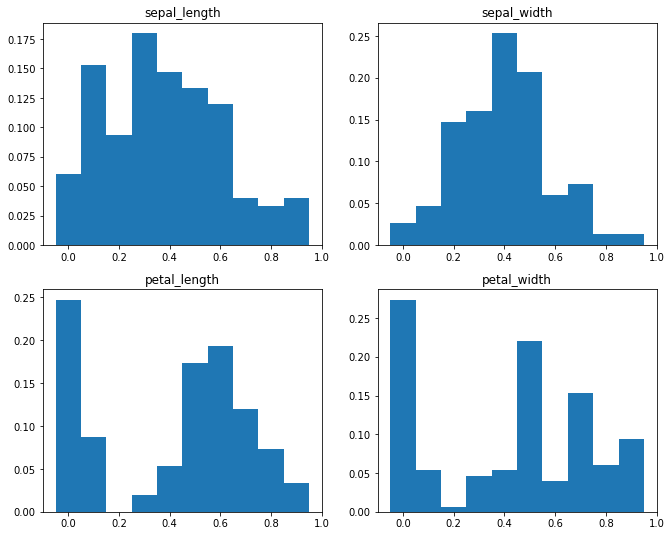

In [8]:
step=[]
for i in range(0,11):
    step.append(i/10)
titles = ["sepal_length", "sepal_width", "petal_length", "petal_width"]    
plt.figure(figsize=(11,9))
for i in range(4):
    plt.subplot(221+i)
    hist = (np.histogram(X_norm[:,i], bins=step)[0]/np.sum(np.histogram(X_norm[:,i], bins=step)[0]))
    bins = np.histogram(X_norm[:,i], bins=step)[1] 
    plt.bar(bins[:-1], hist, width=0.1)
    plt.title(titles[i])
plt.show

# Standardizing

In [9]:
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)


# Plotting probability distribution

<function matplotlib.pyplot.show(*args, **kw)>

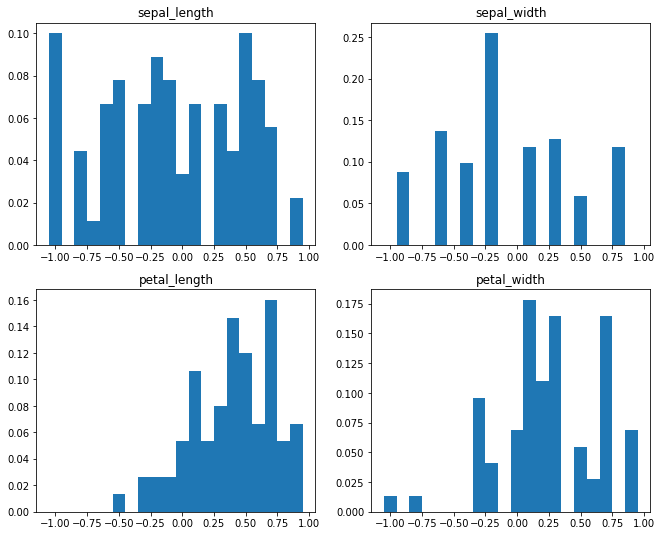

In [10]:
step=[]
for i in range(-10,11):
    step.append(i/10)
titles = ["sepal_length", "sepal_width", "petal_length", "petal_width"]    
plt.figure(figsize=(11,9))
for i in range(4):
    plt.subplot(221+i)
    hist = (np.histogram(rescaledX[:,i], bins=step)[0]/np.sum(np.histogram(rescaledX[:,i], bins=step)[0]))
    bins = np.histogram(rescaledX[:,i], bins=step)[1] 
    plt.bar(bins[:-1], hist, width=0.1)
    plt.title(titles[i])
plt.show

# Resampling


## Class Setosa 

In [11]:
grouped = data.groupby('species').sample(10)
grouped[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
43,5.0,3.5,1.6,0.6,setosa
13,4.3,3.0,1.1,0.1,setosa
1,4.9,3.0,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
35,5.0,3.2,1.2,0.2,setosa


## Class Versicolor

In [12]:
grouped[10:20]

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
55,5.7,2.8,4.5,1.3,versicolor
81,5.5,2.4,3.7,1.0,versicolor
83,6.0,2.7,5.1,1.6,versicolor
60,5.0,2.0,3.5,1.0,versicolor
99,5.7,2.8,4.1,1.3,versicolor
94,5.6,2.7,4.2,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
72,6.3,2.5,4.9,1.5,versicolor
59,5.2,2.7,3.9,1.4,versicolor


## Class Virginica

In [13]:
grouped[20:30]

,sepal_length,sepal_width,petal_length,petal_width,species
115,6.4,3.2,5.3,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
108,6.7,2.5,5.8,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica
140,6.7,3.1,5.6,2.4,virginica
114,5.8,2.8,5.1,2.4,virginica
123,6.3,2.7,4.9,1.8,virginica
116,6.5,3.0,5.5,1.8,virginica
122,7.7,2.8,6.7,2.0,virginica
100,6.3,3.3,6.0,2.5,virginica


# Boxplots

## General plot

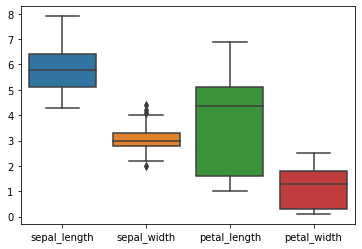

In [14]:
sns.boxplot(data=data)

## Group plot

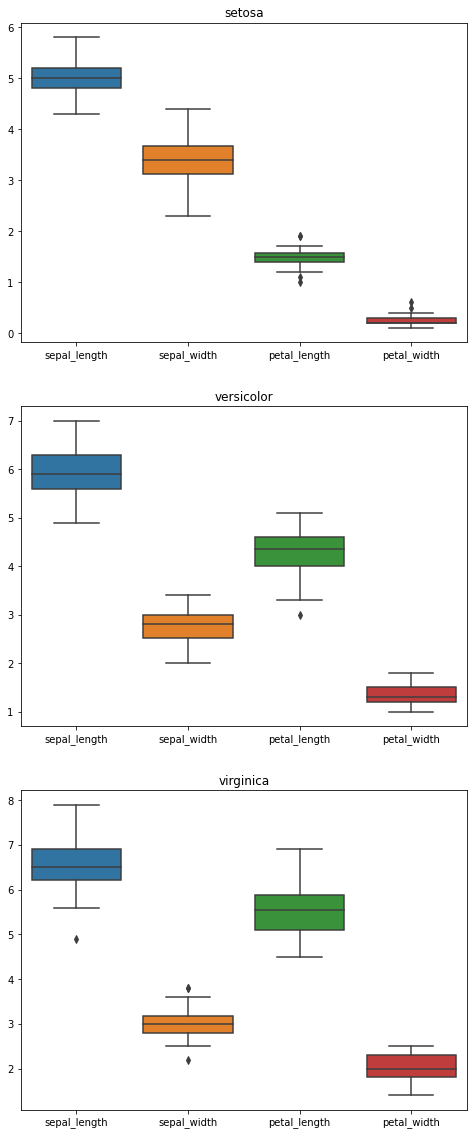

In [15]:
species = data["species"].unique()
group1 = data.groupby('species')
count = 311 
plt.figure(figsize=(8,20))
for i in species:
    plt.subplot(count)
    sns.boxplot(data=group1.get_group(i))
    plt.title(i)
    count+=1

# Finding outliers

## Iris dataset

In [16]:
# Reading csv
data = pd.read_csv('iris.csv', header=(0))

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))
print("Outliers:\n")
for i in data.index[outliers]:
    print(data.iloc[i])
    print("\n")


Outliers:

sepal_length       5.7
sepal_width        4.4
petal_length       1.5
petal_width        0.4
species         setosa
Name: 15, dtype: object


sepal_length       5.2
sepal_width        4.1
petal_length       1.5
petal_width        0.1
species         setosa
Name: 32, dtype: object


sepal_length       5.5
sepal_width        4.2
petal_length       1.4
petal_width        0.2
species         setosa
Name: 33, dtype: object


sepal_length             5
sepal_width              2
petal_length           3.5
petal_width              1
species         versicolor
Name: 60, dtype: object




## New dataset without outliers

In [17]:
new_data= data.drop(data.index[outliers])
new_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Boston House dataset

In [18]:
# Reading csv
data = pd.read_csv('BostonHousing.csv', header=(0))

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))
print("Outliers:\n")
for i in data.index[outliers]:
    print(data.iloc[i])
    print("\n")

Outliers:

crim         0.80271
zn           0.00000
indus        8.14000
chas         0.00000
nox          0.53800
rm           5.45600
age         36.60000
dis          3.79650
rad          4.00000
tax        307.00000
ptratio     21.00000
b          288.99000
lstat       11.69000
medv        20.20000
Name: 18, dtype: float64


crim         0.84054
zn           0.00000
indus        8.14000
chas         0.00000
nox          0.53800
rm           5.59900
age         85.70000
dis          4.45460
rad          4.00000
tax        307.00000
ptratio     21.00000
b          303.42000
lstat       16.51000
medv        13.90000
Name: 25, dtype: float64


crim         0.95577
zn           0.00000
indus        8.14000
chas         0.00000
nox          0.53800
rm           6.04700
age         88.80000
dis          4.45340
rad          4.00000
tax        307.00000
ptratio     21.00000
b          306.38000
lstat       17.28000
medv        14.80000
Name: 27, dtype: float64


crim         1.38799
zn   

crim         1.80028
zn           0.00000
indus       19.58000
chas         0.00000
nox          0.60500
rm           5.87700
age         79.20000
dis          2.42590
rad          5.00000
tax        403.00000
ptratio     14.70000
b          227.61000
lstat       12.14000
medv        23.80000
Name: 167, dtype: float64


crim         2.3004
zn           0.0000
indus       19.5800
chas         0.0000
nox          0.6050
rm           6.3190
age         96.1000
dis          2.1000
rad          5.0000
tax        403.0000
ptratio     14.7000
b          297.0900
lstat       11.1000
medv        23.8000
Name: 168, dtype: float64


crim         2.44953
zn           0.00000
indus       19.58000
chas         0.00000
nox          0.60500
rm           6.40200
age         95.20000
dis          2.26250
rad          5.00000
tax        403.00000
ptratio     14.70000
b          330.04000
lstat       11.32000
medv        22.30000
Name: 169, dtype: float64


crim         1.20742
zn           0.00000
indus 


crim         0.01538
zn          90.00000
indus        3.75000
chas         0.00000
nox          0.39400
rm           7.45400
age         34.20000
dis          6.33610
rad          3.00000
tax        244.00000
ptratio     15.90000
b          386.34000
lstat        3.11000
medv        44.00000
Name: 256, dtype: float64


crim         0.61154
zn          20.00000
indus        3.97000
chas         0.00000
nox          0.64700
rm           8.70400
age         86.90000
dis          1.80100
rad          5.00000
tax        264.00000
ptratio     13.00000
b          389.70000
lstat        5.12000
medv        50.00000
Name: 257, dtype: float64


crim         0.66351
zn          20.00000
indus        3.97000
chas         0.00000
nox          0.64700
rm           7.33300
age        100.00000
dis          1.89460
rad          5.00000
tax        264.00000
ptratio     13.00000
b          383.29000
lstat        7.79000
medv        36.00000
Name: 258, dtype: float64


crim         0.65665
zn          

Name: 374, dtype: float64


crim        19.6091
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6710
rm           7.3130
age         97.9000
dis          1.3163
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       13.4400
medv        15.0000
Name: 375, dtype: float64


crim        15.2880
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6710
rm           6.6490
age         93.3000
dis          1.3449
rad         24.0000
tax        666.0000
ptratio     20.2000
b          363.0200
lstat       23.2400
medv        13.9000
Name: 376, dtype: float64


crim         9.82349
zn           0.00000
indus       18.10000
chas         0.00000
nox          0.67100
rm           6.79400
age         98.80000
dis          1.35800
rad         24.00000
tax        666.00000
ptratio     20.20000
b          396.90000
lstat       21.24000
medv        13.30000
Name: 377, dtype: float64


crim        23.6482
zn           0

## New dataset without outliers

In [19]:
new_data= data.drop(data.index[outliers])
new_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
